In [2]:
#link to google drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#impot libraries
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


In [5]:
#read the dataset
shampoo = pd.read_csv('/content/gdrive/MyDrive/INTERVIEWS/Zalando/shampoo.csv')
shampoo.head()

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [6]:
#check the type
type(shampoo)

pandas.core.frame.DataFrame

In [7]:
#convert the month to index column for easy manipulation
#make the date column to proper date
#convert the dataframe to series
shampoo = pd.read_csv('/content/gdrive/MyDrive/INTERVIEWS/Zalando/shampoo.csv', index_col=[0],parse_dates=True,squeeze=True)

In [8]:
type(shampoo)

pandas.core.series.Series

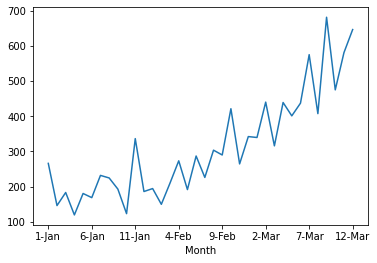

In [9]:
#plot the data
shampoo.plot()

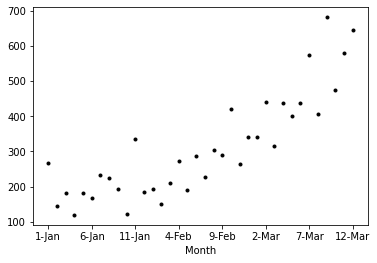

In [13]:
shampoo.plot(style='k.')

In [14]:
#check the data points
shampoo.size

36

In [15]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

Standard deviation - dispersion of a dataset relative to its mean and is calculated as the square root of the variance. The mean can be used to get an overall idea, or picture, of the data set. Mean is best used for a data set with numbers that are close together. The median can be used to get an idea of what values fall above the midpoint and what values fall below the midpoint.

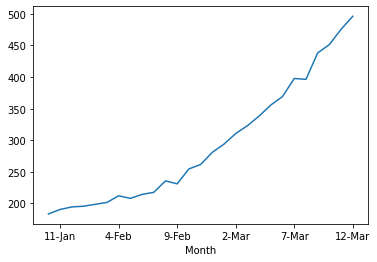

In [21]:
#smoothing of time series
shampoo_ma=shampoo.rolling(window=10).mean()
shampoo_ma.plot()

In [22]:
#create a baseline model
shampoo

Month
1-Jan     266.0
2-Jan     145.9
3-Jan     183.1
4-Jan     119.3
5-Jan     180.3
6-Jan     168.5
7-Jan     231.8
8-Jan     224.5
9-Jan     192.8
10-Jan    122.9
11-Jan    336.5
12-Jan    185.9
1-Feb     194.3
2-Feb     149.5
3-Feb     210.1
4-Feb     273.3
5-Feb     191.4
6-Feb     287.0
7-Feb     226.0
8-Feb     303.6
9-Feb     289.9
10-Feb    421.6
11-Feb    264.5
12-Feb    342.3
1-Mar     339.7
2-Mar     440.4
3-Mar     315.9
4-Mar     439.3
5-Mar     401.3
6-Mar     437.4
7-Mar     575.5
8-Mar     407.6
9-Mar     682.0
10-Mar    475.3
11-Mar    581.3
12-Mar    646.9
Name: Sales, dtype: float64

In [31]:
#shift one data point down
shampoo_base = pd.concat([shampoo,shampoo.shift(1)],axis=1)

In [32]:
shampoo_base

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [42]:
#rename the columns
shampoo_base.columns = ['Actual_Sales','Forecast_Sales']
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [37]:
#drop the null value and make changes to the data
shampoo_base.dropna(inplace=True)

In [43]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [44]:
#calculation of error between the actual and forecast sales
#import libraries
from sklearn.metrics import mean_squared_error
import numpy as np

In [46]:
shampoo_error=mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecast_Sales)
shampoo_error

11715.388285714285

In [48]:
#make the value follow the series matrix (NAIVE model)
np.sqrt(shampoo_error)

108.23764726616282

In [49]:
#create different types of models
#most people use ARIMA(Auto Regressive Integrated Moving Average because it contains different functions)
#ARIMA(p,d,q)
#ARIMA(2,0,0) - auto regressive model (ARI)
#ARIMA(0,0,2) - moving averaged mode (MA)
#we wil use ARIMA which is a combination of everything
#pacf is to evaluate ARI
#acf is for MA

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf




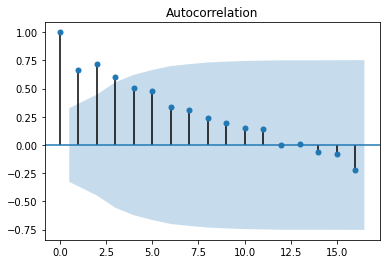

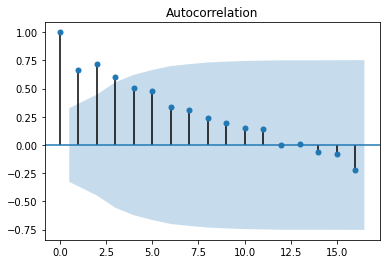

In [50]:
plot_acf(shampoo)

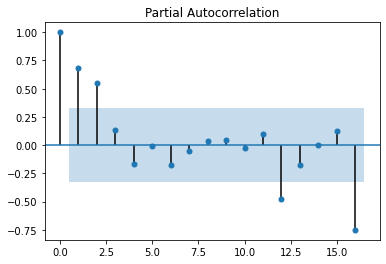

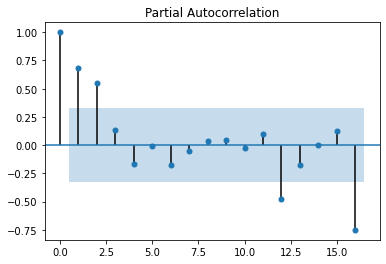

In [51]:
#q - 3 p-2, 
#d - 0-2 (makes the series stationary by removing the seasonality and trends hence helps in doing prediction)
plot_pacf(shampoo)

In [52]:
from statsmodels.tsa.arima_model import ARIMA

In [79]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36] #so that we have some some unseen data when evaluating our model for the calculation of error matrix

In [80]:
shampoo_model = ARIMA(shampoo_train,order=(3,1,2)) #order is q,p,d (experiment with a couple of models to get the right fit)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [81]:
shampoo_model_fit=shampoo_model.fit()

In [82]:
#check how good the model is
shampoo_model_fit.aic

272.38919480711775

In [84]:
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0] # O has the actual forecast values

In [87]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

130.9271234675795

*   Baseline model - 108.23764726616282
*   ARIMA model - 130.9271234675795
*   Baseline model is working better than the ARIMA model when it comes to doing the prediction
*   






In [88]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
for p in p_values:
  for d in d_values:
    for q in q_values:
        order = (p,d,q)
        train,test= shampoo[0:25], shampoo[25:36]
        predictions = list()
        for i in range(len(test)):
            try:
                model = ARIMA(train, order)
                model_fit = model.fit(disp=0)
                pred_y=model_fit.forecast()[0]
                predictions.append(pred_y)
                error = mean_squared_error(test,predictions)
                print('ARIMA%s MSE=%.2f'% (order,error))
            except:
                continue

ARIMA(0, 0, 0) MSE=77950.15
ARIMA(0, 0, 1) MSE=70119.33
ARIMA(0, 0, 2) MSE=58566.59
ARIMA(0, 0, 3) MSE=62031.07
ARIMA(0, 0, 4) MSE=30922.44
ARIMA(0, 1, 0) MSE=33849.87
ARIMA(0, 1, 1) MSE=40654.43
ARIMA(0, 1, 2) MSE=34511.80
ARIMA(0, 2, 0) MSE=34017.03
ARIMA(0, 2, 1) MSE=28391.88
ARIMA(1, 0, 0) MSE=61158.54
ARIMA(1, 0, 1) MSE=46529.03
ARIMA(1, 0, 2) MSE=43922.38
ARIMA(1, 0, 4) MSE=25186.13
ARIMA(1, 1, 0) MSE=31687.09
ARIMA(1, 1, 1) MSE=42176.68
ARIMA(1, 2, 0) MSE=18845.82
ARIMA(1, 2, 1) MSE=26129.56
ARIMA(2, 0, 0) MSE=45248.45
ARIMA(2, 0, 1) MSE=34112.76
ARIMA(2, 1, 0) MSE=35488.31
ARIMA(2, 1, 1) MSE=39633.99
ARIMA(2, 1, 2) MSE=35884.79
ARIMA(2, 2, 0) MSE=34024.19
ARIMA(3, 0, 0) MSE=46326.64
ARIMA(3, 1, 0) MSE=22024.85
ARIMA(3, 1, 1) MSE=22841.65
ARIMA(3, 1, 2) MSE=18095.37
ARIMA(3, 1, 4) MSE=37611.03
ARIMA(3, 2, 0) MSE=24695.25
ARIMA(3, 2, 1) MSE=16368.69
ARIMA(3, 2, 2) MSE=15804.23
ARIMA(3, 2, 3) MSE=14492.32
ARIMA(4, 0, 0) MSE=33233.13
ARIMA(4, 0, 1) MSE=28336.95
ARIMA(4, 0, 2) MSE=2



*   ARIMA(3,2,3) is the best model...sqrt of 14492.32 is 120.38
*   This model is still not better than the Naive model



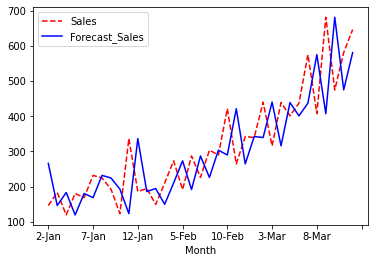

In [115]:
#Plotting forecast using Naive model results

pd.plotting.register_matplotlib_converters()
plt.plot(figsize=(12,8))
shampoo_base["Actual_Sales"].plot(style="--",color="r", legend=True, label="Sales")
shampoo_base["Forecast_Sales"].plot(color="b", legend=True, label="Forecast_Sales");